In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import keras
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.regularizers import l2
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(x_train,y_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] [5 0 4 ... 5 6 8]


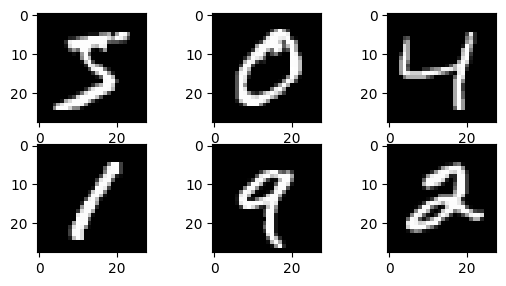

In [6]:
for i in range(6):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Normalizing

In [ ]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [ ]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(x_train.shape[0])

60000


In [ ]:
print((x_train.shape[1:]))

(28, 28)


In [ ]:
print(np.prod(x_train.shape[1:]))

784


In [ ]:
x_train = x_train.reshape(x_train.shape[0], np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0], np.prod(x_test.shape[1:]))

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
print(y_train)
print(y_train.shape)

[5 0 4 ... 5 6 8]
(60000,)


## One hot encoding the Target variable

In [ ]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [ ]:
print(y_train)
print(y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 10)


## 1. Basic Network with 1 Hidden Layer

In [ ]:
model1 = Sequential()
model1.add(Dense(512, input_shape=(784,), activation='relu'))  # Assuming input size is 784 (e.g., for flattened MNIST images)
model1.add(Dense(10, activation='softmax'))  # Output layer with 10 classes (e.g., for classification)

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
784*512 + 512

401920

In [ ]:
history = model1.fit(x_train, y_train, batch_size=128, epochs=3, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model1.evaluate(x_test, y_test, verbose=False)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8709 - loss: 0.4601 - val_accuracy: 0.9604 - val_loss: 0.1337
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9668 - loss: 0.1161 - val_accuracy: 0.9712 - val_loss: 0.0932
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9796 - loss: 0.0733 - val_accuracy: 0.9762 - val_loss: 0.0777


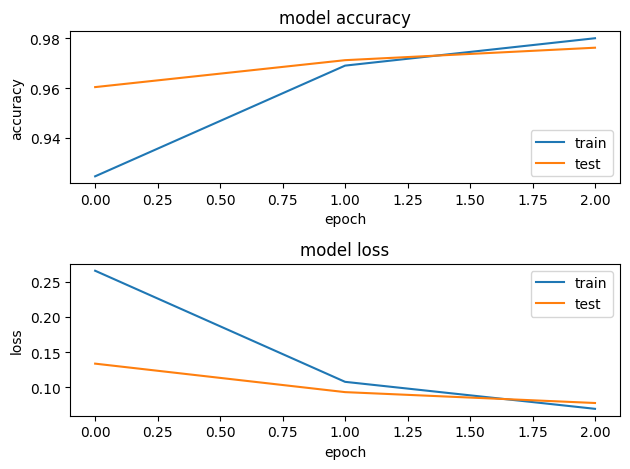

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [ ]:
loss_and_metrics = model1.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[1])
print("Train Accuracy", loss_and_metrics[0])

1875/1875 - 6s - 3ms/step - accuracy: 0.9871 - loss: 0.0475
Train Loss 0.9871166944503784
Train Accuracy 0.04750635847449303


In [ ]:
loss_and_metrics = model1.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[1])
print("Test Accuracy", loss_and_metrics[0])

313/313 - 1s - 3ms/step - accuracy: 0.9762 - loss: 0.0777
Test Loss 0.9761999845504761
Test Accuracy 0.07771600037813187


## 2. Network with 2 Hidden Layers

In [ ]:
model2= Sequential()

In [ ]:
# Define the model
model2 = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),  # Assuming input size is 784 (e.g., for flattened MNIST images)
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes (e.g., for classification)
])

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model2.fit(x_train, y_train, batch_size=128, epochs=3, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model2.evaluate(x_test, y_test, verbose=True)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8777 - loss: 0.4411 - val_accuracy: 0.9649 - val_loss: 0.1219
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9710 - loss: 0.0960 - val_accuracy: 0.9726 - val_loss: 0.0842
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9834 - loss: 0.0560 - val_accuracy: 0.9753 - val_loss: 0.0792
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9724 - loss: 0.0885


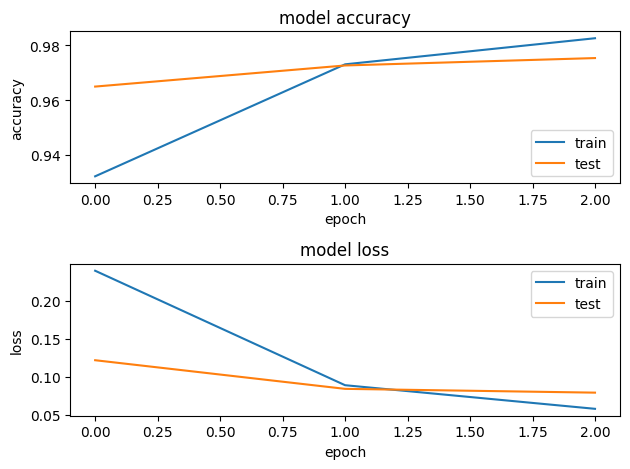

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [ ]:
loss_and_metrics = model2.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 6s - 3ms/step - accuracy: 0.9879 - loss: 0.0402
Train Loss 0.04022276774048805
Train Accuracy 0.9878833293914795


In [ ]:
loss_and_metrics = model2.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - 3ms/step - accuracy: 0.9753 - loss: 0.0792
Test Loss 0.07924390584230423
Test Accuracy 0.9753000140190125


## 3. Network with 3 Hidden Layers

In [ ]:
model3= Sequential()

In [ ]:
model3.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model3.add(Dense(100, activation = 'sigmoid'))
model3.add(Dense(100, activation = 'sigmoid'))
model3.add(Dense(n_classes, activation = 'softmax'))
model3.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 464,330 (1.77 MB)

 Trainable params: 464,330 (1.77 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model3.fit(x_train, y_train, batch_size=128, epochs=3, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model3.evaluate(x_test, y_test, verbose=True)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.1140 - loss: 2.3357 - val_accuracy: 0.1135 - val_loss: 2.2945
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1192 - loss: 2.2939 - val_accuracy: 0.1135 - val_loss: 2.2892
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.1265 - loss: 2.2885 - val_accuracy: 0.1135 - val_loss: 2.2830
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1160 - loss: 2.2836


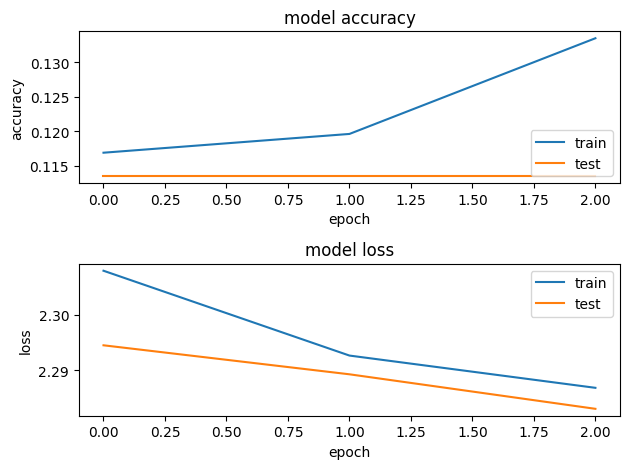

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [ ]:
loss_and_metrics = model3.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 5s - 3ms/step - accuracy: 0.1124 - loss: 2.2834
Train Loss 2.283428192138672
Train Accuracy 0.11236666887998581


In [ ]:
loss_and_metrics = model3.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - 3ms/step - accuracy: 0.1135 - loss: 2.2830
Test Loss 2.2829692363739014
Test Accuracy 0.11349999904632568


## 4. Network with 2 layers and ReLU as an activation func for 1 layer

In [ ]:
model4= Sequential()

In [ ]:
model4.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model4.add(Dense(100, activation = 'relu'))
model4.add(Dense(n_classes, activation = 'softmax'))
model4.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,230 (1.73 MB)

 Trainable params: 454,230 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model4.fit(x_train, y_train, batch_size=128, epochs=3, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model4.evaluate(x_test, y_test, verbose=True)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.3589 - loss: 2.1421 - val_accuracy: 0.6814 - val_loss: 1.5669
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7264 - loss: 1.3927 - val_accuracy: 0.7992 - val_loss: 0.9238
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8071 - loss: 0.8565 - val_accuracy: 0.8386 - val_loss: 0.6572
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8110 - loss: 0.7207


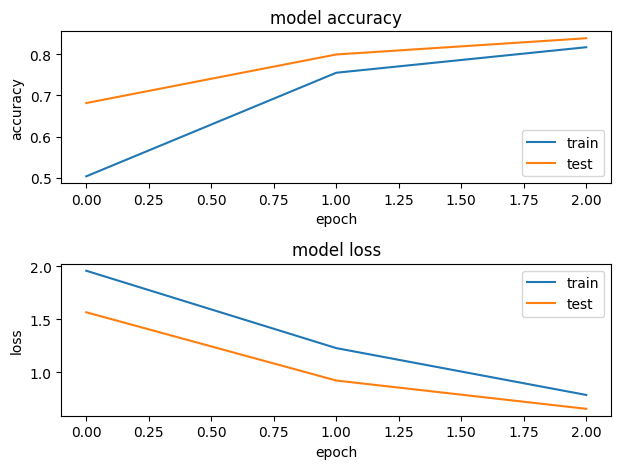

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [ ]:
loss_and_metrics = model4.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 5s - 3ms/step - accuracy: 0.8308 - loss: 0.6761
Train Loss 0.6760567426681519
Train Accuracy 0.8307666778564453


In [ ]:
loss_and_metrics = model4.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - 3ms/step - accuracy: 0.8386 - loss: 0.6572
Test Loss 0.6572274565696716
Test Accuracy 0.8385999798774719


## 5. Network with 2 layers and ReLU as an activation func for 1 layer and ADAM optimiser

In [ ]:
model5= Sequential()

In [ ]:
model5.add(Dense(512, input_shape = (784,), activation= 'sigmoid'))
model5.add(Dense(100, activation = 'relu'))
model5.add(Dense(n_classes, activation = 'softmax'))
model5.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,230 (1.73 MB)

 Trainable params: 454,230 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model5.fit(x_train, y_train, batch_size=128, epochs=3, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model5.evaluate(x_test, y_test, verbose=True)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7903 - loss: 0.7603 - val_accuracy: 0.9204 - val_loss: 0.2663
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9302 - loss: 0.2362 - val_accuracy: 0.9444 - val_loss: 0.1830
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9500 - loss: 0.1711 - val_accuracy: 0.9552 - val_loss: 0.1490
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9476 - loss: 0.1694


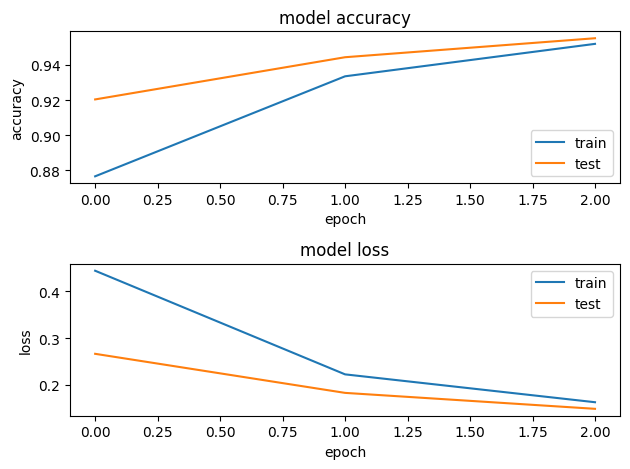

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [ ]:
loss_and_metrics = model5.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 5s - 3ms/step - accuracy: 0.9609 - loss: 0.1327
Train Loss 0.13267658650875092
Train Accuracy 0.9608500003814697


In [ ]:
loss_and_metrics = model5.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - 3ms/step - accuracy: 0.9552 - loss: 0.1490
Test Loss 0.1490301936864853
Test Accuracy 0.9552000164985657


## 6. Network with BatchNormalization

In [ ]:
model6= Sequential()

In [ ]:
# Define the model
model6 = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),  # Assuming input size is 784 (e.g., for flattened MNIST images)
    BatchNormalization(),

    Dense(100, activation='relu'),
    BatchNormalization(),

    Dense(10, activation='softmax')  # Output layer with 10 classes (e.g., for classification)
])

# Compile the model
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model6.fit(x_train, y_train, batch_size=128, epochs=3, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model6.evaluate(x_test, y_test, verbose=True)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9016 - loss: 0.3269 - val_accuracy: 0.9684 - val_loss: 0.0981
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9791 - loss: 0.0716 - val_accuracy: 0.9728 - val_loss: 0.0830
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9870 - loss: 0.0433 - val_accuracy: 0.9771 - val_loss: 0.0756
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9734 - loss: 0.0893


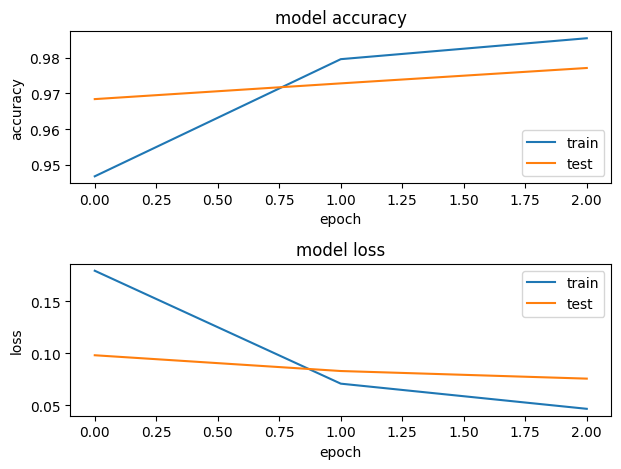

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

## Model Evaluation

In [ ]:
loss_and_metrics = model6.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 5s - 3ms/step - accuracy: 0.9884 - loss: 0.0386
Train Loss 0.03857813775539398
Train Accuracy 0.9884499907493591


In [ ]:
loss_and_metrics = model6.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - 5ms/step - accuracy: 0.9771 - loss: 0.0756
Test Loss 0.07562453299760818
Test Accuracy 0.9771000146865845


## 7. Network with Dropout, L2 regularizer, kernel initializer

In [ ]:
model7= Sequential()

In [ ]:
model7.add(Dropout(0.2,input_shape=(784,)))
model7.add(Dense(512, activation= 'sigmoid',kernel_regularizer=l2(0.005),kernel_initializer='uniform')) # Changed l2(l=0.005) to l2(0.005)
model7.add(BatchNormalization())
model7.add(Dropout(rate=0.5))
model7.add(Dense(100, activation = 'relu', kernel_regularizer=l2(0.005),kernel_initializer='uniform')) # Changed l2(l=0.005) to l2(0.005)
model7.add(BatchNormalization())
model7.add(Dropout(rate=0.5))
model7.add(Dense(n_classes, activation = 'softmax'))
model7.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
model7.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 100)                 │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 456,678 (1.74 MB)

 Trainable params: 455,454 (1.74 MB)

 Non-trainable params: 1,224 (4.78 KB)

In [ ]:
history = model7.fit(x_train, y_train, batch_size=128, epochs=3, verbose=True, validation_data= (x_test, y_test)) #validation_split=.1
loss, accuracy  = model7.evaluate(x_test, y_test, verbose=True)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.6658 - loss: 2.1895 - val_accuracy: 0.9070 - val_loss: 0.8786
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.8125 - loss: 0.9846 - val_accuracy: 0.9239 - val_loss: 0.5566
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.8208 - loss: 0.8448 - val_accuracy: 0.9249 - val_loss: 0.5374
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9112 - loss: 0.5757


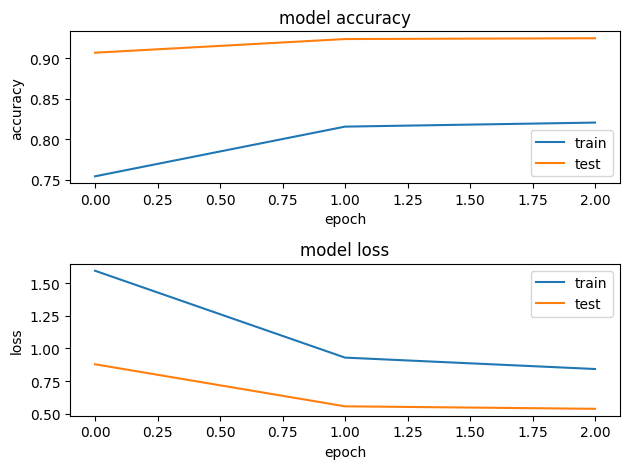

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

##  Model Evaluation

In [ ]:
loss_and_metrics = model7.evaluate(x_train, y_train, verbose=2)

print("Train Loss", loss_and_metrics[0])
print("Train Accuracy", loss_and_metrics[1])

1875/1875 - 8s - 4ms/step - accuracy: 0.9233 - loss: 0.5433
Train Loss 0.5433443188667297
Train Accuracy 0.9233333468437195


In [ ]:
loss_and_metrics = model7.evaluate(x_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - 4ms/step - accuracy: 0.9249 - loss: 0.5374
Test Loss 0.5374245643615723
Test Accuracy 0.9248999953269958


In [ ]:
model1
training : 99
test: 97
print(model1)

<Sequential name=sequential, built=True>
